# Lista 3: Execício 1

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab

Sinal: $y = A \cdot cos(\omega \cdot t + \phi)$

Parâmetros:
* Conhecidos: $\omega$
* Disponíveis: $y$
* Estimados: $A$, $\phi$


In [216]:
# Parametros
w = 5

In [217]:
# Parâmetros de simulação
N = 30
dt = 0.01  # Taxa de amostragem
T = np.arange(0, N + dt, dt)

len(T)

3001

In [218]:
# Definiçaõ de A e phi sendo variantes no tempo 
A = np.ones((2, len(T)))
phi = np.zeros((2, len(T)))


for i in range(len(T)):
    if T[i] >= 0 and T[i] <= 10:
        A[:,i] = 3
        phi[:,i] = 0.436
    else:
        A[:,i] = 5
        phi[:, i] = 0.611

A.shape, phi.shape

((2, 3001), (2, 3001))

A: (2, 3001), phi: (2, 3001), T: (2, 3001)
y: (2, 3001)


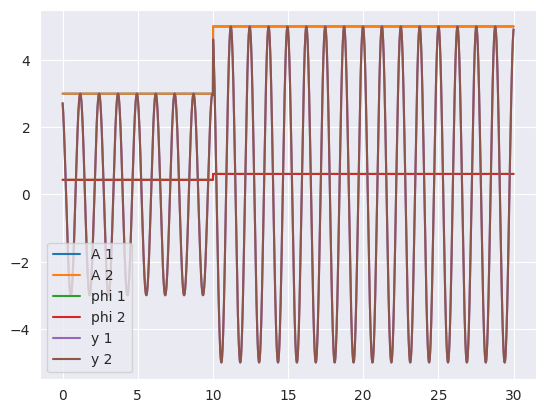

In [219]:

# Simulação dos modelos
T = np.tile(T, (2, 1))

print(f'A: {A.shape}, phi: {phi.shape}, T: {T.shape}')
y = A * np.cos(np.dot(w, T) + phi)

print(f'y: {y.shape}')


# Plotagem dos resultados juntos
corte = int(np.ceil(len(T[0])))
plt.plot(T[0][:corte], A[0][:corte], label='A 1')
plt.plot(T[0][:corte], A[1][:corte], label='A 2')
plt.plot(T[0][:corte], phi[0][:corte], label='phi 1')
plt.plot(T[0][:corte], phi[1][:corte], label='phi 2')
plt.plot(T[0][:corte], y[0][:corte], label='y 1')
plt.plot(T[0][:corte], y[1][:corte], label='y 2')

plt.legend()
plt.show()

In [220]:
theta = np.zeros((2, int(N/dt) + 1))  # Matriz para armazenar os parâmetros estimados
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros

theta[:, 0] = [0, np.pi/2]  # Condição inicial
gama = np.array([[1, 0], [0, 1]])  # Matriz de ajuste

In [221]:
# Loop de iterações para o algoritmo adaptativo
for k in range(0, int(N/dt)): 
    # Construção do vetor phi
    phi = np.array([[phi1[k]], [phi2[k]]])
    
    # Cálculo de ms (fator de ajuste)
    ms = 1 + 0.1 * np.dot(phi.T, phi)[0, 0]

    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    erro[k+1] = (z[k] - np.dot(theta[:, k].T, phi))[0] / ms
    delta_theta = (dt * np.dot(gama, erro[k+1] * phi) / ms).reshape((2,))
    theta[:, k+1] = theta[:, k] + delta_theta

NameError: name 'phi1' is not defined

ValueError: x and y must have same first dimension, but have shapes (2, 301) and (91,)

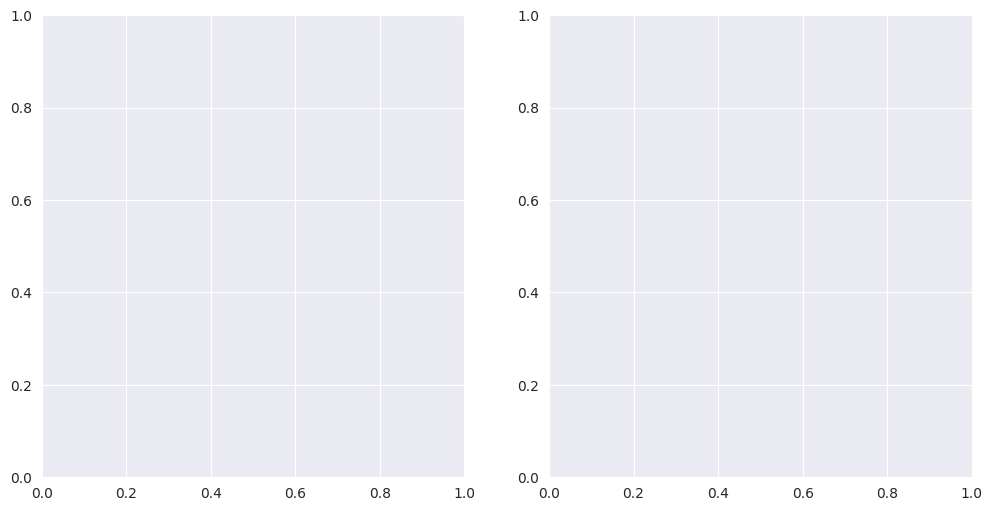

In [ ]:
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

corte = int(np.ceil(0.3*len(theta[0])))

fontesize = 14
titlesize = 20
# Primeiro subplot (Gráfico dos parâmetros estimados)
axs[0].plot(T[:corte], theta[0, :][:corte], label='a0')
axs[0].plot(T[:corte], theta[1, :][:corte], label='a1')
axs[0].legend()
axs[0].set_xlabel('samples', fontsize=fontesize)
axs[0].set_ylabel('parametro estimado', fontsize=fontesize)
axs[0].set_title('Gradiente', fontsize=titlesize)

# Segundo subplot (Gráfico do erro)
axs[1].plot(T[:corte], erro[:corte], 'y', linewidth=2)
axs[1].set_xlabel('samples', fontsize=fontesize)
axs[1].set_ylabel('erro', fontsize=fontesize)
axs[1].set_title('Erro', fontsize=titlesize)
axs[1].grid(True)

# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()